In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("students.csv")

In [4]:
df.head()

,Student ID,Name,Age,Gender,Branch,Average GPA,Backlogs,Attendance (%),Clubs,Skills,...,CTC (LPA),Alumni Path,Sem1 GPA,Sem2 GPA,Sem3 GPA,Sem4 GPA,Sem5 GPA,Sem6 GPA,Sem7 GPA,Sem8 GPA
0,b37412a3-fa5c-40ca-b087-7109a47482d7,Amit,21.0,Male,MECH,6.99,0.0,70.45,"Literary Society, Robotics","C++, Machine Learning, Python, Java",...,0.00,NaN,8.34,5.24,6.06,7.81,7.18,7.04,8.26,5.99
1,65001423-faeb-4d19-a550-8ea26133a34d,Tina Ballard,19.0,Male,ECE,6.46,0.0,65.45,"Literary Society, Coding Club","C++, SQL, Web Development",...,0.00,NaN,7.37,6.37,6.45,5.99,6.55,6.99,6.46,5.52
2,228aaf1d-8710-4c8d-bfec-001b0df01f34,Meena,19.0,Female,CIVIL,7.08,0.0,84.79,Literary Society,"Data Science, SQL, Machine Learning",...,0.00,NaN,5.79,8.82,7.03,6.92,7.67,6.01,7.75,6.62
3,1aa67474-e200-4157-ad54-c95aaa4d52a8,Christopher Morales,23.0,Male,ECE,6.92,2.0,62.26,"Coding Club, Entrepreneurship Cell","Python, SQL, Java",...,5.89,Research,7.90,4.26,8.19,7.52,8.32,6.80,4.94,7.43
4,5122db4a-14c8-44d7-b2f4-e869f69d3dd7,Siddharth,20.0,Male,EEE,7.09,0.0,97.12,Robotics,"C++, SQL, Java, Python",...,0.00,NaN,6.86,6.24,7.64,7.15,5.91,6.18,8.19,8.54


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         1999 non-null   object 
 1   Name               2000 non-null   object 
 2   Age                1999 non-null   float64
 3   Gender             1999 non-null   object 
 4   Branch             1999 non-null   object 
 5   Average GPA        1999 non-null   float64
 6   Backlogs           1999 non-null   float64
 7   Attendance (%)     1999 non-null   float64
 8   Clubs              1999 non-null   object 
 9   Skills             1999 non-null   object 
 10  Internship Done    1999 non-null   object 
 11  Internship Domain  982 non-null    object 
 12  Placement Status   1999 non-null   object 
 13  Placement Domain   1032 non-null   object 
 14  CTC (LPA)          1999 non-null   float64
 15  Alumni Path        1032 non-null   object 
 16  Sem1 GPA           1999 

In [7]:
df.isna().sum()

Student ID              1
Name                    0
Age                     1
Gender                  1
Branch                  1
Average GPA             1
Backlogs                1
Attendance (%)          1
Clubs                   1
Skills                  1
Internship Done         1
Internship Domain    1018
Placement Status        1
Placement Domain      968
CTC (LPA)               1
Alumni Path           968
Sem1 GPA                1
Sem2 GPA                1
Sem3 GPA                1
Sem4 GPA                1
Sem5 GPA                1
Sem6 GPA                1
Sem7 GPA                1
Sem8 GPA                1
dtype: int64

In [8]:
df[df['Student ID'].isna()]

,Student ID,Name,Age,Gender,Branch,Average GPA,Backlogs,Attendance (%),Clubs,Skills,...,CTC (LPA),Alumni Path,Sem1 GPA,Sem2 GPA,Sem3 GPA,Sem4 GPA,Sem5 GPA,Sem6 GPA,Sem7 GPA,Sem8 GPA
863,NaN,Vivaan Reddy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.loc[df['Internship Domain'].isna(), 'Internship Done'].value_counts().reindex(['Yes', 'No'], fill_value=0)

Internship Done
Yes       0
No     1017
Name: count, dtype: int64

In [10]:
df.loc[df['Placement Domain'].isna(), 'Placement Status'].value_counts().reindex(['Placed', 'Not Placed'], fill_value=0)

Placement Status
Placed          0
Not Placed    967
Name: count, dtype: int64

In [11]:
df.loc[df['Alumni Path'].isna(), 'Placement Status'].value_counts().reindex(['Placed', 'Not Placed'], fill_value=0)


Placement Status
Placed          0
Not Placed    967
Name: count, dtype: int64

In [12]:
df = df.dropna(axis = 0,subset = ['Student ID'])
df['Student ID'].isna().sum()

0

In [13]:
df['Placement Domain'] = df['Placement Domain'].fillna('Not Placed')
df['Alumni Path'] = df['Alumni Path'].fillna('Not Applicable')
df['Internship Domain'] = df['Internship Domain'].fillna('No Internship')

In [14]:
df[['Placement Domain','Alumni Path','Internship Domain']].isna().sum()

Placement Domain     0
Alumni Path          0
Internship Domain    0
dtype: int64

In [15]:
df.isnull().sum()

Student ID           0
Name                 0
Age                  0
Gender               0
Branch               0
Average GPA          0
Backlogs             0
Attendance (%)       0
Clubs                0
Skills               0
Internship Done      0
Internship Domain    0
Placement Status     0
Placement Domain     0
CTC (LPA)            0
Alumni Path          0
Sem1 GPA             0
Sem2 GPA             0
Sem3 GPA             0
Sem4 GPA             0
Sem5 GPA             0
Sem6 GPA             0
Sem7 GPA             0
Sem8 GPA             0
dtype: int64

In [16]:
df.describe()

,Age,Average GPA,Backlogs,Attendance (%),CTC (LPA),Sem1 GPA,Sem2 GPA,Sem3 GPA,Sem4 GPA,Sem5 GPA,Sem6 GPA,Sem7 GPA,Sem8 GPA
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.00000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,20.474237,7.002616,0.966983,78.933147,5.795898,6.976433,7.08021,6.980905,6.961736,7.037894,6.939355,6.990310,7.054812
std,1.728062,0.341148,0.990905,11.730931,6.563695,0.966329,1.03160,0.985273,0.983697,0.984407,0.954357,1.018425,1.032945
min,18.000000,6.050000,0.000000,60.040000,0.000000,4.000000,4.10000,4.000000,4.000000,4.000000,4.150000,4.000000,4.000000
25%,19.000000,6.770000,0.000000,69.000000,0.000000,6.330000,6.39000,6.280000,6.275000,6.370000,6.270000,6.300000,6.355000
50%,21.000000,7.000000,1.000000,78.310000,3.460000,6.980000,7.09000,6.940000,6.910000,7.030000,6.930000,6.970000,7.110000
75%,22.000000,7.215000,1.000000,89.220000,11.260000,7.670000,7.82000,7.630000,7.640000,7.685000,7.575000,7.700000,7.765000
max,23.000000,8.070000,5.000000,99.980000,19.990000,10.000000,10.00000,10.000000,9.630000,9.780000,10.000000,9.920000,10.000000


In [5]:
df.to_csv("clean_student_data.csv", index=False)

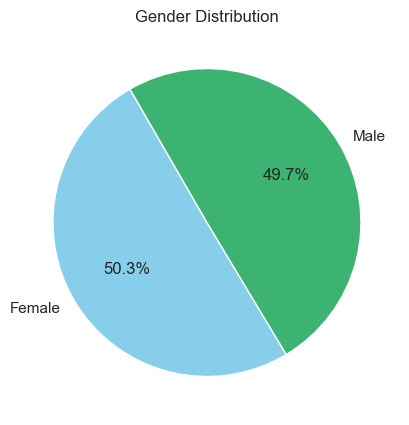

In [91]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_counts,labels=gender_counts.index, autopct='%1.1f%%', startangle=120, colors = ['skyblue', 'mediumseagreen'])
plt.title('Gender Distribution')
plt.show()

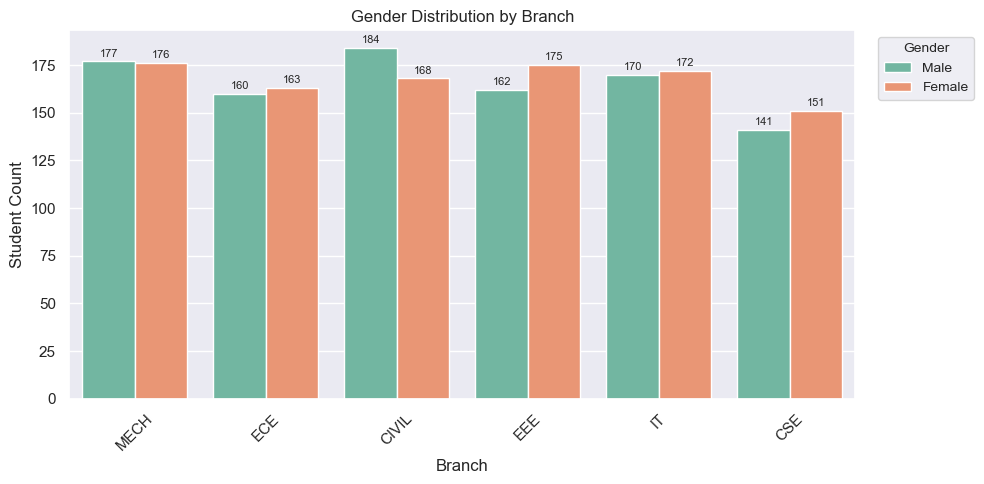

In [19]:
plt.figure(figsize=(10, 5))
sns.set(style="darkgrid")

ax = sns.countplot(data=df, x='Branch', hue='Gender', palette='Set2')

plt.title('Gender Distribution by Branch')
plt.xlabel('Branch')
plt.ylabel('Student Count')
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)

plt.legend(
    title='Gender',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize='small',
    title_fontsize='small'
)

plt.tight_layout()
plt.show()


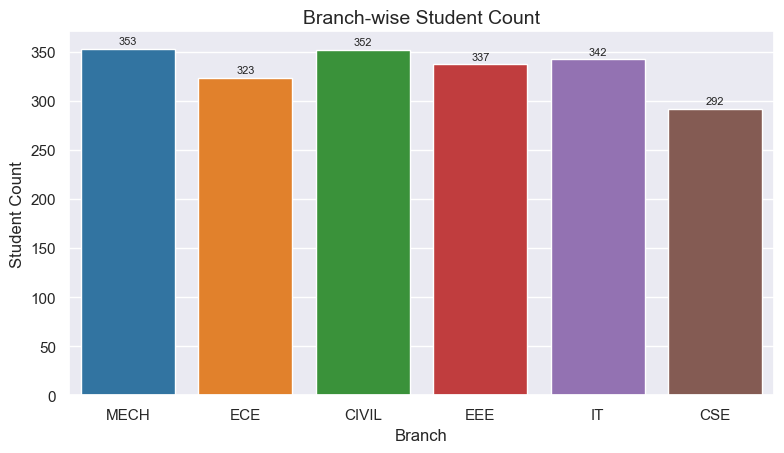

In [85]:
sns.set(style="darkgrid")

plt.figure(figsize=(8, 4.7))

ax = sns.countplot(x='Branch', hue='Branch', data=df, palette='tab10')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)

plt.title('Branch-wise Student Count', fontsize=14)
plt.xlabel('Branch')
plt.ylabel('Student Count')
plt.tight_layout()
plt.show()


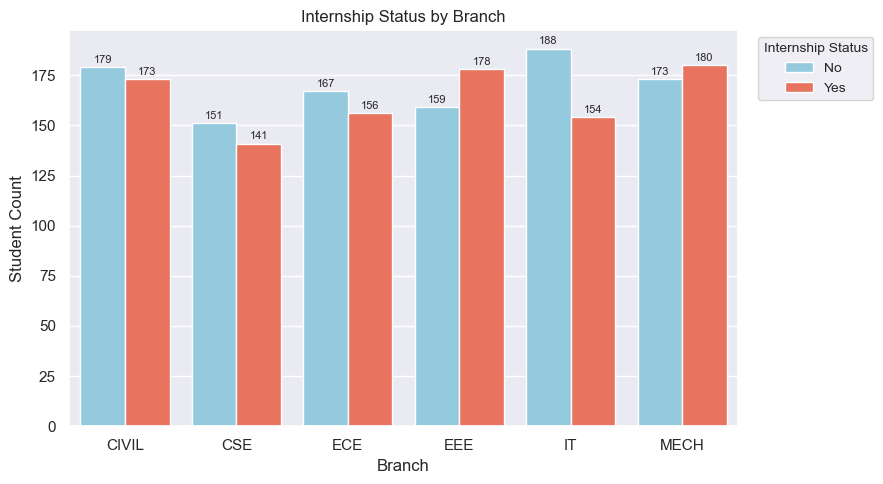

In [94]:
internship_branch_wise = df.groupby('Branch')['Internship Done'].value_counts().reset_index()
plt.figure(figsize=(9, 5))

ax = sns.barplot(x= 'Branch',y = 'count', hue = 'Internship Done',data = internship_branch_wise, palette = {'skyblue','tomato'})

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)
    
plt.legend(
    title='Internship Status',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize='small',
    title_fontsize='small'
)
plt.title('Internship Status by Branch')
plt.xlabel('Branch')
plt.ylabel('Student Count')
plt.tight_layout()
plt.show()

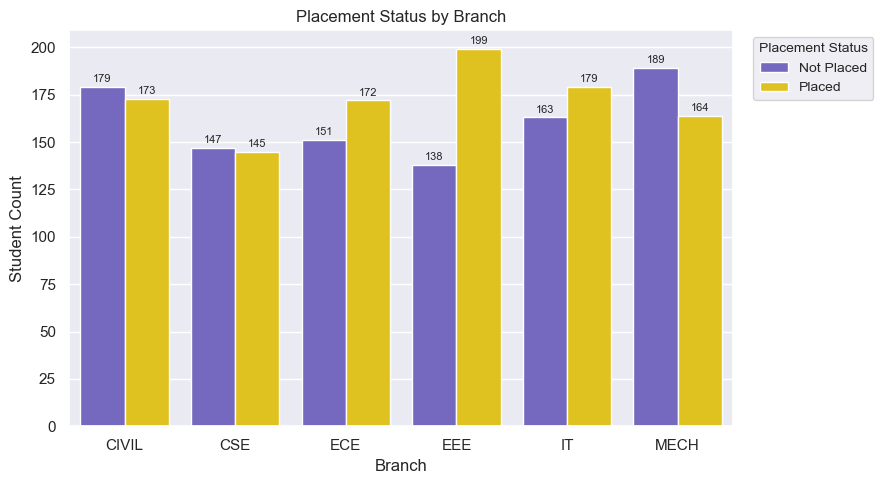

In [95]:
placement_branch_wise = df.groupby('Branch')['Placement Status'].value_counts().reset_index()
plt.figure(figsize=(9, 5))

ax = sns.barplot(x= 'Branch',y = 'count', hue = 'Placement Status',data = placement_branch_wise,palette = {'slateblue','gold'})

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)
    
plt.legend(
    title='Placement Status',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize='small',
    title_fontsize='small'
)
plt.title('Placement Status by Branch')
plt.xlabel('Branch')
plt.ylabel('Student Count')
plt.tight_layout()
plt.show()

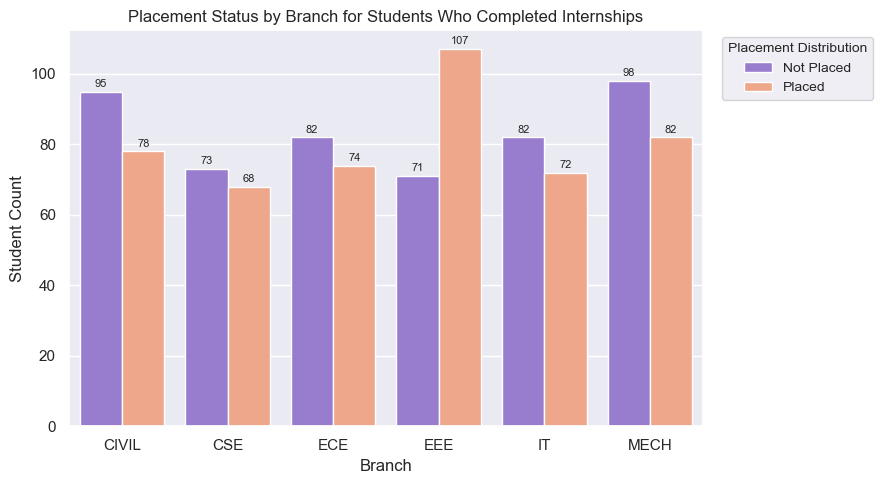

In [96]:
intern_placement = df[df['Internship Done'] == 'Yes'].groupby('Branch')['Placement Status'].value_counts().reset_index()
plt.figure(figsize=(9, 5))

ax = sns.barplot(x= 'Branch',y = 'count', hue = 'Placement Status',data = intern_placement, palette = {'mediumpurple','lightsalmon'})

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)
    
plt.legend(
    title='Placement Distribution',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize='small',
    title_fontsize='small'
)
plt.title('Placement Status by Branch for Students Who Completed Internships')
plt.xlabel('Branch')
plt.ylabel('Student Count')
plt.tight_layout()
plt.show()

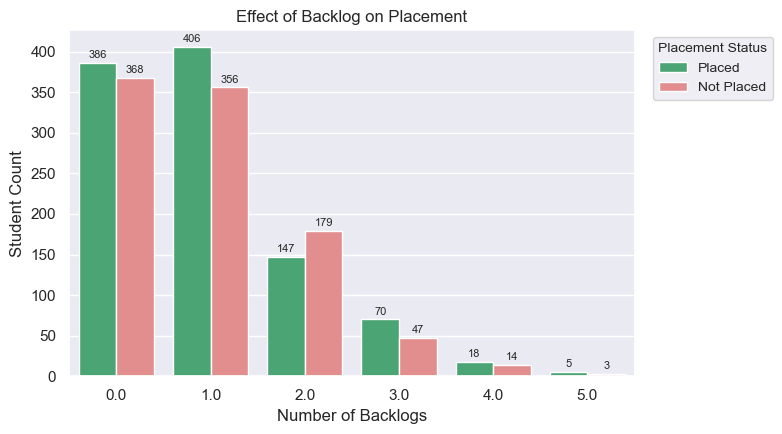

In [99]:
effect_backlog = df.groupby('Backlogs')['Placement Status'].value_counts().reset_index()
plt.figure(figsize=(8, 4.5))

ax = sns.barplot(x='Backlogs', y='count', hue='Placement Status', data=effect_backlog, palette= {'mediumseagreen','lightcoral'})

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)

plt.legend(
    title='Placement Status',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize='small',
    title_fontsize='small'
)
plt.title('Effect of Backlog on Placement')
plt.xlabel('Number of Backlogs')
plt.ylabel('Student Count') 
plt.tight_layout()
plt.show()


In [116]:
print(df.columns.tolist())

['Student ID', 'Name', 'Age', 'Gender', 'Branch', 'Average GPA', 'Backlogs', 'Attendance (%)', 'Clubs', 'Skills', 'Internship Done', 'Internship Domain', 'Placement Status', 'Placement Domain', 'CTC (LPA)', 'Alumni Path', 'Sem1 GPA', 'Sem2 GPA', 'Sem3 GPA', 'Sem4 GPA', 'Sem5 GPA', 'Sem6 GPA', 'Sem7 GPA', 'Sem8 GPA']


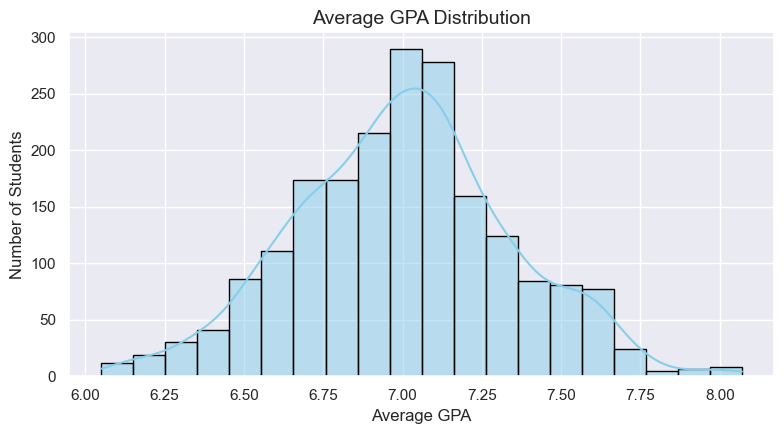

In [108]:
plt.figure(figsize=(8, 4.5))
sns.histplot(df['Average GPA'], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.title('Average GPA Distribution', fontsize=14)
plt.xlabel('Average GPA', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.tight_layout()
plt.show()


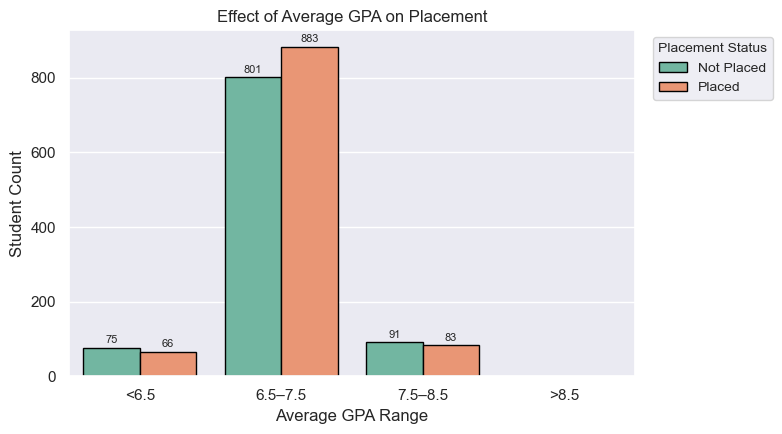

In [101]:
df['GPA Group'] = pd.cut(df['Average GPA'], bins=[0, 6.5, 7.5, 8.5, 10], labels=['<6.5', '6.5–7.5', '7.5–8.5', '>8.5'])

gpa_placement = df.groupby('GPA Group', observed=True)['Placement Status'].value_counts().rename('count').reset_index()

plt.figure(figsize=(8, 4.5))
ax = sns.barplot(x='GPA Group', y='count', hue='Placement Status', data=gpa_placement, palette='Set2', edgecolor='black')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)

plt.legend(
    title='Placement Status',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize='small',
    title_fontsize='small'
)
plt.title('Effect of Average GPA on Placement')
plt.xlabel('Average GPA Range')
plt.ylabel('Student Count')
plt.tight_layout()
plt.show()

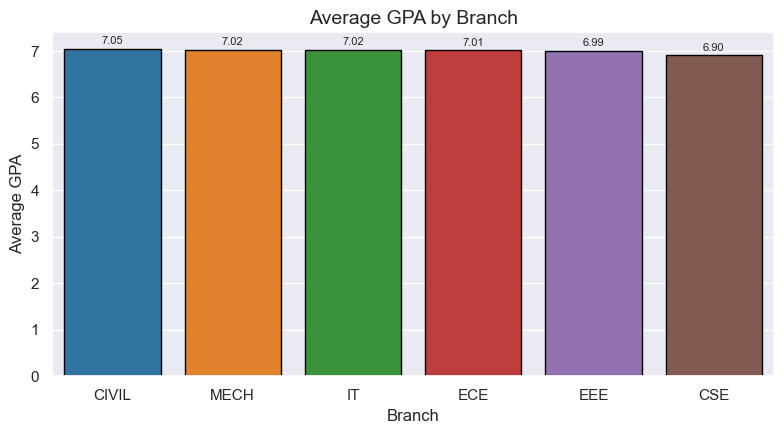

In [64]:
sns.set(style="darkgrid")

avg_gpa= df.groupby('Branch')['Average GPA'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 4.5))
ax = sns.barplot(x='Branch', y='Average GPA', data=avg_gpa, palette='tab10', edgecolor='black', hue='Branch', dodge=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, padding=2)

plt.title('Average GPA by Branch', fontsize=14)
plt.xlabel('Branch')
plt.ylabel('Average GPA')
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

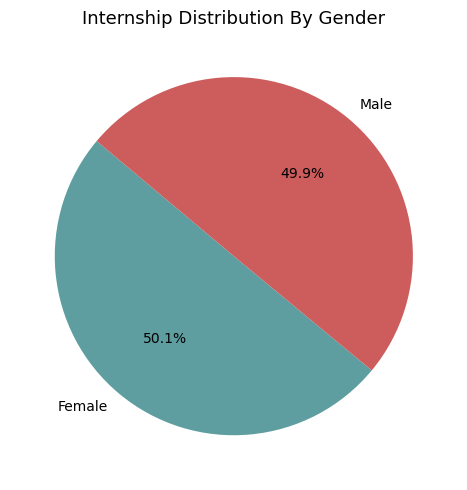

In [10]:
internship_gender = df[df['Internship Done'] == 'Yes']

gender_counts = internship_gender['Gender'].value_counts()

colors = ['cadetblue', 'indianred']

plt.figure(figsize=(5, 5))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

plt.title('Internship Distribution By Gender', fontsize=13)
plt.tight_layout()
plt.show()


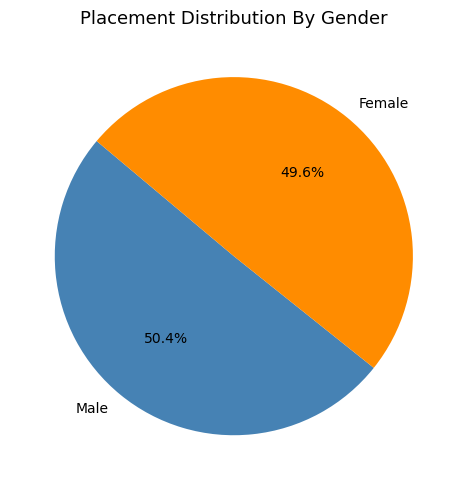

In [11]:

placement_gender = df[df['Placement Status'] == 'Placed']

gender_counts = placement_gender['Gender'].value_counts()

colors = ['steelblue', 'darkorange']

plt.figure(figsize=(5, 5))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

plt.title('Placement Distribution By Gender', fontsize=13)
plt.tight_layout()
plt.show()
